# README
- 学习滤波及傅立叶变换
  - 巴特沃滋滤波
  - 卡尔曼滤波

In [11]:
# 导入包
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

In [2]:
# 导入数据
path = "../ExampleData/XsensMVN穿鞋步行数据.xlsx"

In [3]:
os.getcwd()

'/Users/wangshuaibo/Documents/ScriptsofShuai/Notes/Workbook'

In [5]:
Excel_file = pd.ExcelFile(path)
Excel_file.sheet_names

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [8]:
df = pd.read_excel(path, 'Joint Angles ZXY')
df.columns

Index(['Frame', 'L5S1 Lateral Bending', 'L5S1 Axial Bending',
       'L5S1 Flexion/Extension', 'L4L3 Lateral Bending', 'L4L3 Axial Rotation',
       'L4L3 Flexion/Extension', 'L1T12 Lateral Bending',
       'L1T12 Axial Rotation', 'L1T12 Flexion/Extension',
       'T9T8 Lateral Bending', 'T9T8 Axial Rotation', 'T9T8 Flexion/Extension',
       'T1C7 Lateral Bending', 'T1C7 Axial Rotation', 'T1C7 Flexion/Extension',
       'C1 Head Lateral Bending', 'C1 Head Axial Rotation',
       'C1 Head Flexion/Extension', 'Right T4 Shoulder Abduction/Adduction',
       'Right T4 Shoulder Internal/External Rotation',
       'Right T4 Shoulder Flexion/Extension',
       'Right Shoulder Abduction/Adduction',
       'Right Shoulder Internal/External Rotation',
       'Right Shoulder Flexion/Extension',
       'Right Elbow Ulnar Deviation/Radial Deviation',
       'Right Elbow Pronation/Supination', 'Right Elbow Flexion/Extension',
       'Right Wrist Ulnar Deviation/Radial Deviation',
       'Right Wris

<Axes: >

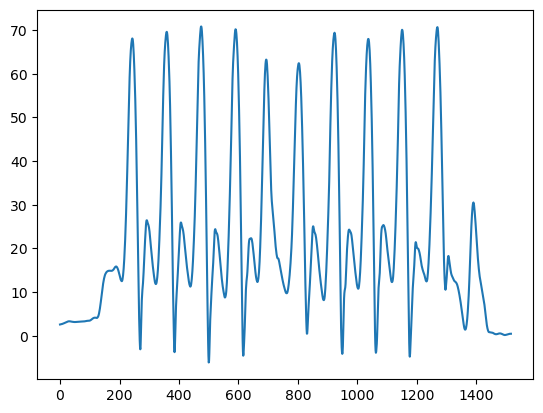

In [10]:
df['Right Knee Flexion/Extension'].plot()

# 快速傅里叶变换

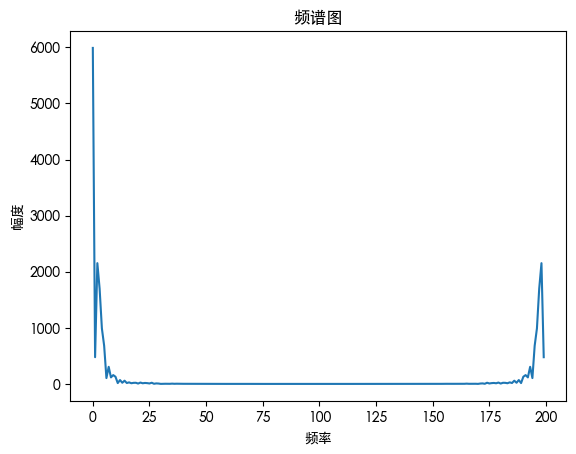

In [37]:
# 快速傅里叶变换
R_Knee_Joint = df['Right Knee Flexion/Extension'][200:400]
fft_result = np.fft.fft(R_Knee_Joint) #执行快速傅里叶变换
maganitude_spectrum = np.abs(fft_result) #幅度谱
power_spectrum = np.abs(fft_result) ** 2 #功率谱

# 显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(maganitude_spectrum)
plt.xlabel("频率")
plt.ylabel("幅度")
plt.title("频谱图")
plt.show()

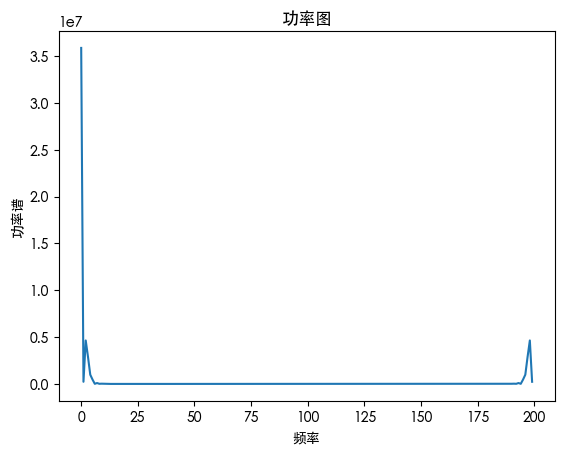

In [38]:
plt.plot(power_spectrum)
plt.xlabel("频率")
plt.ylabel("功率谱")
plt.title("功率图")
plt.show()

# 巴特沃滋滤波

In [39]:
# 截止频率_不归一会报错
sampling_rate = 100
cuttoff_freq =  10
order = 4
filter_type = "lowpass"
b, a = signal.butter(order, cuttoff_freq, btype=filter_type,
              analog=False, output="ba")
cutoff_signal = signal.filtfilt(b, a, R_Knee_Joint)

ValueError: Digital filter critical frequencies must be 0 < Wn < 1

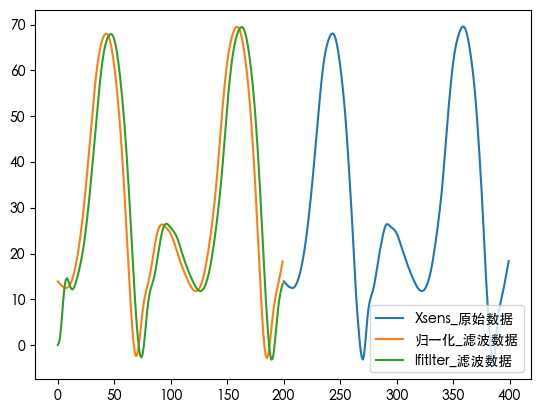

In [42]:
# 归一化的截止频率
# 以奈奎斯特（Nyquist）频率进行归一化（
normalized_cutoff_freq = cuttoff_freq/(sampling_rate / 2)
b, a = signal.butter(order,normalized_cutoff_freq,btype=filter_type,
                     analog=False,output="ba")
Normalized_cutoff_signal = signal.filtfilt(b, a, R_Knee_Joint)
lifter_signal = signal.lfilter(b, a, R_Knee_Joint)

# 绘图
plt.plot(R_Knee_Joint,label="Xsens_原始数据")
plt.plot(Normalized_cutoff_signal, label="归一化_滤波数据")
plt.plot(lifter_signal, label="lfitlter_滤波数据")
plt.legend()


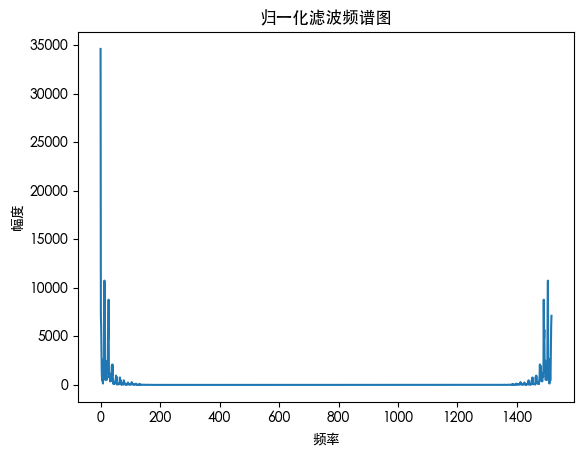

In [29]:
fft_result = np.fft.fft(Normalized_cutoff_signal) #执行快速傅里叶变换
maganitude_spectrum = np.abs(fft_result) #幅度谱
power_spectrum = np.abs(fft_result) ** 2 #功率谱

# 显示中文
plt.rcParams['font.sans-serif'] = ['Heiti TC']
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

plt.plot(maganitude_spectrum)
plt.xlabel("频率")
plt.ylabel("幅度")
plt.title("归一化滤波频谱图")
plt.show()

## 结论
1. Xsens 关节角度数据已经进行二阶无滞后巴特沃滋低通滤波，再进行滤波差异不大
2. 巴特沃滋需要先计算 ba 参数，然后再进行滤波
3. 巴特沃滋滤波必须使用 Niqust 归一化后的频率进行截断
4. 无滞后滤波是指巴特沃滋滤波中使用 signal.flitflit() 而不是 siganl.lfilter()
5. 不使用无滞后滤波会使得相位发生偏移
6. 低通滤波后，显示 fft 变化的结果仍然包括高频部分（为什么？）

# 卡尔曼滤波

In [43]:
!pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 709.6 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48444 sha256=2d73ab7a1bb78c37d510396ddc44d20f4a65f53c9b425dae6ef2513c2c1cb07c
  Stored in directory: /Users/wangshuaibo/Library/Caches/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


滤波后的状态值： [0.63155474 0.78093305 0.97685864 1.17644704 1.3764038  1.66584416
 1.78583974 1.97739521 2.17650388 2.3764098  2.57639987]


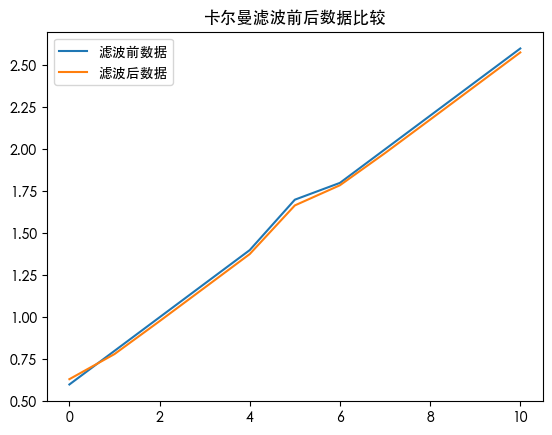

In [66]:
import numpy as np
from pykalman import KalmanFilter

# 示例数据
observed_data = np.array([0.6, 0.8, 1, 1.2, 1.4, 1.7, 1.8, 2.0, 2.2, 2.4,2.6]) #观测数据

#创建 KalmanFilter对象
kf = KalmanFilter(transition_matrices=[1], observation_matrices=[1])
kf = kf.em(observed_data)

# 使用KalmanFilter对象进行滤波
filtered_state_means, filter_state_cavariances = kf.filter(observed_data)

print("滤波后的状态值：", filtered_state_means.flatten())
#print("滤波后的状态协方差矩阵：", filter_state_cavariances)

# 绘图
plt.title("卡尔曼滤波前后数据比较")
plt.plot(observed_data, label="滤波前数据")
plt.plot(filtered_state_means.flatten(), label="滤波后数据")
plt.legend()